In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(color_codes=True)
%matplotlib inline

In [2]:
d1 = pd.read_csv('data/pebench.2015.10.28.csv')
d2 = pd.read_csv('data/pebench.2016-03-09.csv')
d1.describe(include='all')

,start_time,host,dataset,command,running_time,cluster_name,cluster_cpus,cluster_mem_gb,dataset_size_gb,suite
count,2405,2405,2405,2405,2405.000000,2405,2405.000000,2405.000000,2405.000000,2405
unique,84,10,7,15,NaN,5,NaN,NaN,NaN,3
top,2015-10-24T10:30:07.995831,52.91.124.168,flight001,ddf.summary(),NaN,bench08,NaN,NaN,NaN,stats
freq,40,350,425,285,NaN,595,NaN,NaN,NaN,1120
mean,NaN,NaN,NaN,NaN,104.064872,NaN,55.051975,220.207900,33.744283,NaN
std,NaN,NaN,NaN,NaN,304.568986,NaN,43.583638,174.334551,45.824703,NaN
min,NaN,NaN,NaN,NaN,0.084948,NaN,8.000000,32.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,3.109600,NaN,16.000000,64.000000,6.000000,NaN
50%,NaN,NaN,NaN,NaN,13.467890,NaN,32.000000,128.000000,12.000000,NaN
75%,NaN,NaN,NaN,NaN,63.934254,NaN,64.000000,256.000000,48.000000,NaN


In [3]:
# 1st test use "sq" for smartquery suite name while the 2nd one use "smartquery"
# rename sq suite in d1 to "smartquery"
d1.suite = d1.suite.apply(lambda suite: 'smartquery' if suite == 'sq' else suite)
d1.suite.unique()

array(['stats', 'ml', 'smartquery'], dtype=object)

In [4]:
# d1 doesn't have concurrent level as it wasn't added until 2nd run
# thus, all cases in 1st test have concurrent level = 1
d1['concurrent_level'] = 1
d1.columns.difference(d2.columns)

Index([], dtype='object')

In [5]:
# combine data from both run
both = d1.append(d2)
both.columns

Index([u'cluster_cpus', u'cluster_mem_gb', u'cluster_name', u'command',
       u'concurrent_level', u'dataset', u'dataset_size_gb', u'host',
       u'running_time', u'start_time', u'suite'],
      dtype='object')

In [6]:
# filter for only SQ suite and relevant columns
d = both[both.suite == 'smartquery'][['cluster_mem_gb', 'concurrent_level', 'dataset_size_gb', 'running_time']]
d.describe()

,cluster_mem_gb,concurrent_level,dataset_size_gb,running_time
count,3661.000000,3661.000000,3661.000000,3652.000000
mean,97.713193,15.936902,11.038241,41.880625
std,124.137918,13.265206,31.186792,56.739808
min,32.000000,1.000000,1.000000,0.072026
25%,32.000000,1.000000,1.000000,6.836119
50%,64.000000,16.000000,1.000000,21.486045
75%,64.000000,32.000000,1.000000,47.528556
max,512.000000,32.000000,192.000000,505.340998


In [7]:
group = d.groupby(('cluster_mem_gb', 'dataset_size_gb', 'concurrent_level'))
agg = group.agg([np.median, np.mean, np.var])
agg

running_time              \
                                                      median        mean   
cluster_mem_gb dataset_size_gb concurrent_level                            
32             1               1                    3.140899    4.496662   
                               2                    3.855731    4.725602   
                               4                    7.355432    8.655953   
                               8                   15.005345   17.909355   
                               16                  27.264856   32.732980   
                               32                 101.772988  115.865732   
               6               1                    8.377842   17.392072   
               12              1                   15.942486   32.556160   
               24              1                   29.403296   65.432604   
64             1               1                    2.210428    2.878041   
                               2                    2.300325    2.760245   
                               4                    4.279138    4.823384   
                               8                    8.185124    9.260801   
                               16                  14.724952   17.414847   
                               32                  29.914563   34.427295   
               6               1                    4.845621   10.177659   
               12              1                    8.187268   19.620119   
               24              1                   15.656738   36.738890   
               48              1                   29.525870   73.193252   
128            1               1                    2.112094    2.424752   
               6               1                    3.047483    5.635720   
               12              1                    4.817877   10.251698   
               24              1                    8.708606   19.219102   
               48              1                   15.368392   38.217954   
               96              1                   30.153232   73.424114   
256            1               1                    2.117934    2.373120   
               6               1                    2.270723    3.762567   
               12              1                    4.032493    6.047745   
               24              1                    6.588221   11.586772   
               48              1                   13.337906   23.959650   
               96              1                   25.299939   47.372305   
               192             1                   47.587448   88.290177   
512            1               1                    2.268355    2.694458   
               6               1                    2.504752    3.567312   
               12              1                    3.033549    4.165302   
               24              1                    5.062125    6.996633   
               48              1                    9.461605   13.071204   
               96              1                   15.499179   25.536333   
               192             1                  145.271315  183.035943   

                                                               
                                                          var  
cluster_mem_gb dataset_size_gb concurrent_level                
32             1               1                    16.076588  
                               2                    16.538054  
                               4                    49.301199  
                               8                   261.589545  
                               16                  559.928017  
                               32                 4569.470688  
               6               1                   354.841598  
               12              1                  1284.891194  
               24              1                  5199.946786  
64             1               1                     5.947125  
                       

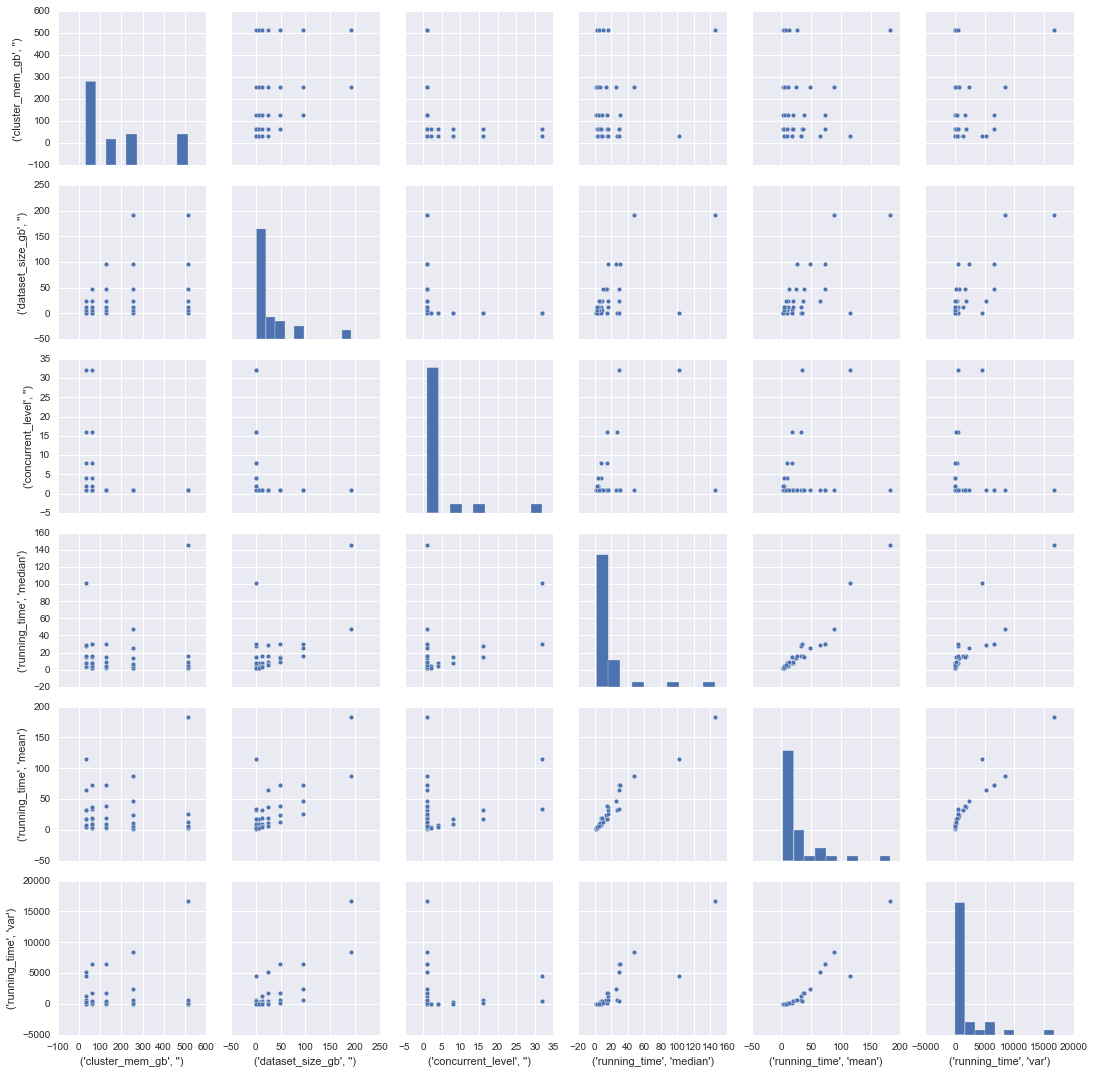

In [8]:
agg = agg.reset_index()
sns.pairplot(agg)

In [10]:
# simple prediction
def predict_running_time_simple(r):
    return 3 * r['concurrent_level'] * r['dataset_size_gb'] / (r['cluster_mem_gb'] / 32)

agg['predict_running_time_simple'] = agg.apply(predict_running_time_simple, axis=1)
agg.set_index(['cluster_mem_gb', 'dataset_size_gb', 'concurrent_level'])

rmse = np.sqrt(np.sum(np.power(agg['predict_running_time_simple'] - agg['running_time']['median'], 2)) / len(agg))
print 'rmse: {}'.format(rmse)
agg

rmse: 22.9952767813


cluster_mem_gb dataset_size_gb concurrent_level running_time              \
                                                         median        mean   
0              32               1                1     3.140899    4.496662   
1              32               1                2     3.855731    4.725602   
2              32               1                4     7.355432    8.655953   
3              32               1                8    15.005345   17.909355   
4              32               1               16    27.264856   32.732980   
5              32               1               32   101.772988  115.865732   
6              32               6                1     8.377842   17.392072   
7              32              12                1    15.942486   32.556160   
8              32              24                1    29.403296   65.432604   
9              64               1                1     2.210428    2.878041   
10             64               1                2     2.300325    2.760245   
11             64               1                4     4.279138    4.823384   
12             64               1                8     8.185124    9.260801   
13             64               1               16    14.724952   17.414847   
14             64               1               32    29.914563   34.427295   
15             64               6                1     4.845621   10.177659   
16             64              12                1     8.187268   19.620119   
17             64              24                1    15.656738   36.738890   
18             64              48                1    29.525870   73.193252   
19            128               1                1     2.112094    2.424752   
20            128               6                1     3.047483    5.635720   
21            128              12                1     4.817877   10.251698   
22            128              24                1     8.708606   19.219102   
23            128              48                1    15.368392   38.217954   
24            128              96                1    30.153232   73.424114   
25            256               1                1     2.117934    2.373120   
26            256               6                1     2.270723    3.762567   
27            256              12                1     4.032493    6.047745   
28            256              24                1     6.588221   11.586772   
29            256              48                1    13.337906   23.959650   
30            256              96                1    25.299939   47.372305   
31            256             192                1    47.587448   88.290177   
32            512               1                1     2.268355    2.694458   
33            512               6                1     2.504752    3.567312   
34            512              12                1     3.033549    4.165302   
35            512              24                1     5.062125    6.996633   
36            512              48                1     9.461605   13.071204   
37            512              96                1    15.499179   25.536333   
38            512             192                1   145.271315  183.035943   

                 predict_running_time_simple  
             var                              
0      16.076588                      3.0000  
1      16.538054                      6.0000  
2      49.301199                     12.0000  
3     261.589545                     24.0000  
4     559.928017                     48.0000  
5    4569.470688                     96.0000  
6     354.841598                     18.0000  
7    1284.891194                     36.0000  
8    5199.946786                     72.0000  
9       5.947125                      1.5000  
10      4.004240                      3.0000  
11     12.674083                      6.0000  
12     51.499969                     12.0000  
13    149.883520                     24.0000  
14    495.9

0.656248636486


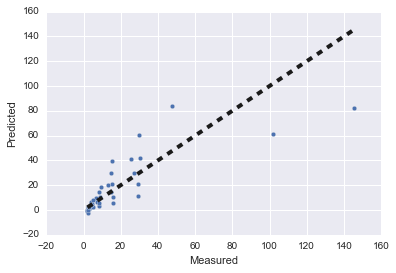

[ 1.94455945  0.44245171 -0.00595025] -1.45577451733


In [11]:
# @vupham

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict

X = agg[['concurrent_level', 'dataset_size_gb', 'cluster_mem_gb']].values
y = agg['running_time']['median'].values
lr = LinearRegression(fit_intercept=True, normalize=False)
# predicted = cross_val_predict(lr, X, y, cv=10)
lr.fit(X, y)
predicted = lr.predict(X)

print lr.score(X, y)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print lr.coef_, lr.intercept_

In [14]:
def predict_running_time(r):
    return -1.45577451733 + 1.94455945 * r['concurrent_level'] + 0.44245171 * r['dataset_size_gb'] - 0.00595025 * r['cluster_mem_gb']

agg['predict_running_time'] = agg.apply(predict_running_time, axis=1)


rmse = np.sqrt(np.sum(np.power(agg['predict_running_time'] - agg['running_time']['median'], 2)) / len(agg))
print 'rmse: {}'.format(rmse)
agg

rmse: 15.994658539


cluster_mem_gb dataset_size_gb concurrent_level running_time              \
                                                         median        mean   
0              32               1                1     3.140899    4.496662   
1              32               1                2     3.855731    4.725602   
2              32               1                4     7.355432    8.655953   
3              32               1                8    15.005345   17.909355   
4              32               1               16    27.264856   32.732980   
5              32               1               32   101.772988  115.865732   
6              32               6                1     8.377842   17.392072   
7              32              12                1    15.942486   32.556160   
8              32              24                1    29.403296   65.432604   
9              64               1                1     2.210428    2.878041   
10             64               1                2     2.300325    2.760245   
11             64               1                4     4.279138    4.823384   
12             64               1                8     8.185124    9.260801   
13             64               1               16    14.724952   17.414847   
14             64               1               32    29.914563   34.427295   
15             64               6                1     4.845621   10.177659   
16             64              12                1     8.187268   19.620119   
17             64              24                1    15.656738   36.738890   
18             64              48                1    29.525870   73.193252   
19            128               1                1     2.112094    2.424752   
20            128               6                1     3.047483    5.635720   
21            128              12                1     4.817877   10.251698   
22            128              24                1     8.708606   19.219102   
23            128              48                1    15.368392   38.217954   
24            128              96                1    30.153232   73.424114   
25            256               1                1     2.117934    2.373120   
26            256               6                1     2.270723    3.762567   
27            256              12                1     4.032493    6.047745   
28            256              24                1     6.588221   11.586772   
29            256              48                1    13.337906   23.959650   
30            256              96                1    25.299939   47.372305   
31            256             192                1    47.587448   88.290177   
32            512               1                1     2.268355    2.694458   
33            512               6                1     2.504752    3.567312   
34            512              12                1     3.033549    4.165302   
35            512              24                1     5.062125    6.996633   
36            512              48                1     9.461605   13.071204   
37            512              96                1    15.499179   25.536333   
38            512             192                1   145.271315  183.035943   

                 predict_running_time_simple predict_running_time  
             var                                                   
0      16.076588                      3.0000             0.740829  
1      16.538054                      6.0000             2.685388  
2      49.301199                     12.0000             6.574507  
3     261.589545                     24.0000            14.352745  
4     559.928017                     48.0000            29.909220  
5    4569.470688                     96.0000            61.022172  
6     354.841598                     18.0000             2.953087  
7    1284.891194                     36.0000             5.607797  
8    5199.946786                     72.0000            10.917218  
9       5.94712